In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
sns.set()


# 1. Učitavanje i osnovni pregled podataka

In [2]:
# lepši prikaz tabela
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [3]:
# učitavanje CSV fajlova
ratings = pd.read_csv("../data/raw/ratings.csv")
movies = pd.read_csv("../data/raw/movies.csv")
tags = pd.read_csv("../data/raw/tags.csv")

In [4]:
print("RATINGS:")
display(ratings.head())

RATINGS:


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
print("MOVIES:")
display(movies.head())

MOVIES:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print("TAGS:")
display(tags.head())

TAGS:


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


## 2. Osnovne informacije i struktura tabela

In [7]:
print("RATINGS INFO:")
ratings.info()

RATINGS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [8]:
print("MOVIES INFO:")
movies.info()

MOVIES INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
print("TAGS INFO:")
tags.info()

TAGS INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


## 3. Nedostajuće vrednosti i duplikati

In [10]:
# nedostajuće vrednosti
print("Nedostajuće vrednosti po koloni:")
print("Ratings:\n", ratings.isnull().sum())
print("\nMovies:\n", movies.isnull().sum())
print("\nTags:\n", tags.isnull().sum())

# duplikati
print("\nBroj duplikata:")
print("Ratings:", ratings.duplicated().sum())
print("Movies:", movies.duplicated().sum())
print("Tags:", tags.duplicated().sum())


Nedostajuće vrednosti po koloni:
Ratings:
 userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Movies:
 movieId    0
title      0
genres     0
dtype: int64

Tags:
 userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Broj duplikata:
Ratings: 0
Movies: 0
Tags: 0


## 4. Osnovna statistika i distribucija ocena

In [11]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()

print(f"Broj korisnika: {n_users}")
print(f"Broj filmova: {n_movies}")
print(f"Ukupan broj ocena: {len(ratings)}")

Broj korisnika: 610
Broj filmova: 9724
Ukupan broj ocena: 100836


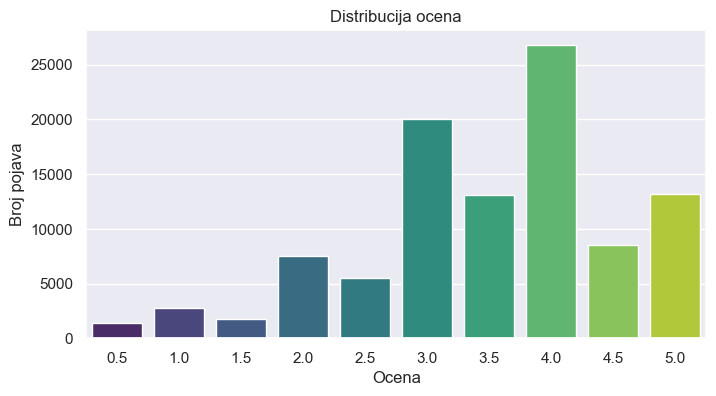

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

In [12]:
# distribucija ocena
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(8,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="viridis")
plt.title("Distribucija ocena")
plt.xlabel("Ocena")
plt.ylabel("Broj pojava")
plt.show()

# prosečna ocena po filmu
avg_rating_per_movie = ratings.groupby('movieId')['rating'].mean()
avg_rating_per_movie.describe()

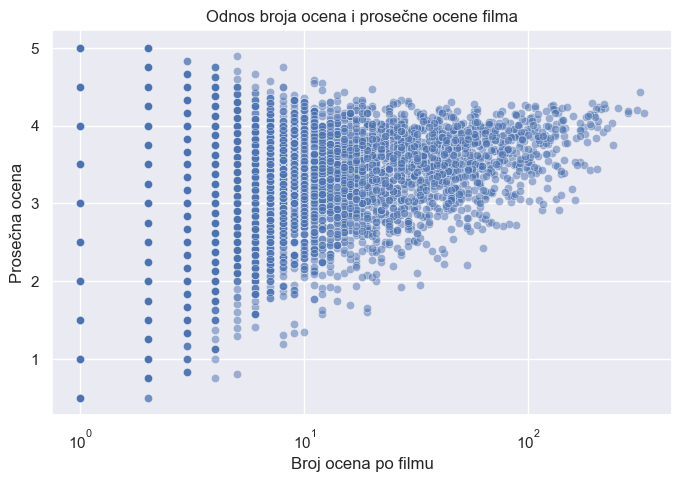

Korelacija između broja ocena i prosečne ocene: 0.127


In [13]:
movie_stats = ratings.groupby('movieId').agg(
    mean_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
)

plt.figure(figsize=(8,5))
sns.scatterplot(data=movie_stats, x='num_ratings', y='mean_rating', alpha=0.5)
plt.title("Odnos broja ocena i prosečne ocene filma")
plt.xlabel("Broj ocena po filmu")
plt.ylabel("Prosečna ocena")
plt.xscale('log')
plt.show()

corr = movie_stats['num_ratings'].corr(movie_stats['mean_rating'])
print(f"Korelacija između broja ocena i prosečne ocene: {corr:.3f}")


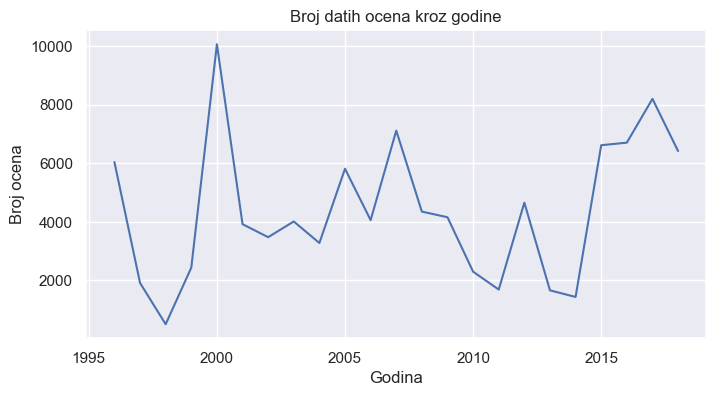

In [14]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year

yearly_activity = ratings.groupby('year')['rating'].count()

plt.figure(figsize=(8,4))
sns.lineplot(x=yearly_activity.index, y=yearly_activity.values)
plt.title("Broj datih ocena kroz godine")
plt.xlabel("Godina")
plt.ylabel("Broj ocena")
plt.show()


## 5. Najpopularniji filmovi i distribucija žanrova

In [15]:
# broj ocena po filmu
movie_counts = ratings['movieId'].value_counts()
top_movies = movies[movies['movieId'].isin(movie_counts.head(10).index)]

print("Top 10 najčešće ocenjenih filmova:")
display(top_movies.assign(count=movie_counts.loc[top_movies['movieId']].values))

Top 10 najčešće ocenjenih filmova:


,movieId,title,genres,count
97,110,Braveheart (1995),Action|Drama|War,237
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,317
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,329
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238
461,527,Schindler's List (1993),Drama|War,220
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278


In [16]:
no_genre = movies[movies['genres'].isna() | (movies['genres'].str.strip() == '') | (movies['genres'] == '(no genres listed)')]

print(f"Broj filmova bez žanra: {len(no_genre)}")
display(no_genre.head())

Broj filmova bez žanra: 34


,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)


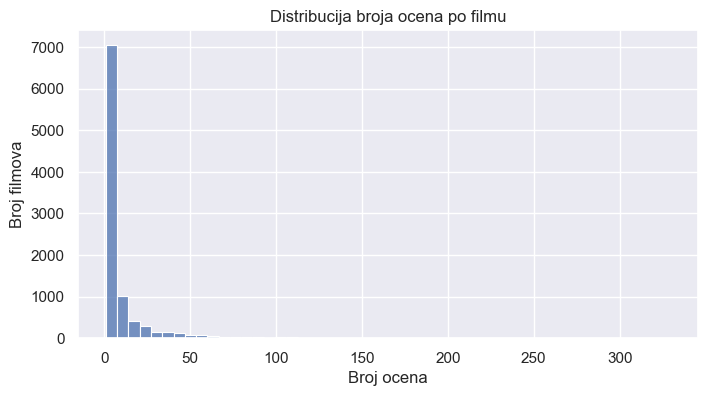

In [17]:
# broj ocena po filmu - histogram
plt.figure(figsize=(8,4))
sns.histplot(movie_counts, bins=50)
plt.title("Distribucija broja ocena po filmu")
plt.xlabel("Broj ocena")
plt.ylabel("Broj filmova")
plt.show()

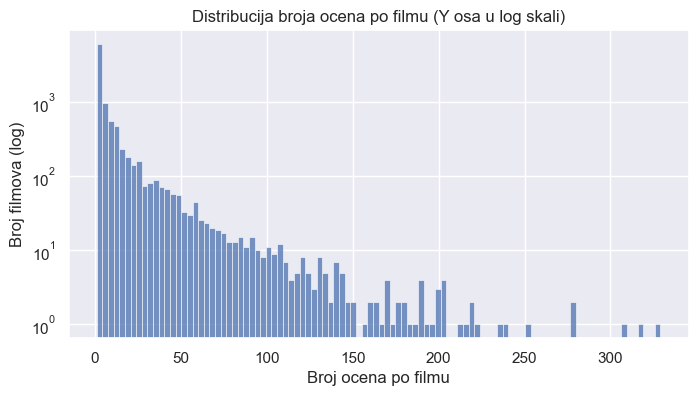

In [18]:
movie_counts = ratings['movieId'].value_counts()

plt.figure(figsize=(8,4))
sns.histplot(movie_counts, bins=100, log_scale=(False, True))  # log Y-os
plt.title("Distribucija broja ocena po filmu (Y osa u log skali)")
plt.xlabel("Broj ocena po filmu")
plt.ylabel("Broj filmova (log)")
plt.show()


In [19]:
quantiles = movie_counts.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95])
display(quantiles)

count    9724.000000
mean       10.369807
std        22.401005
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
90%        27.000000
95%        47.000000
max       329.000000
Name: count, dtype: float64

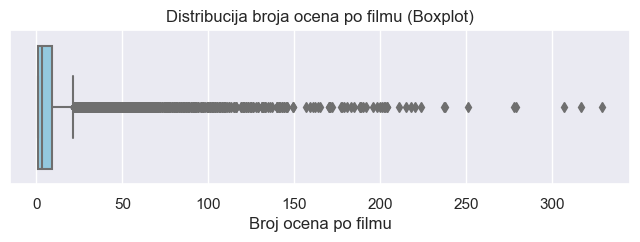

In [20]:
plt.figure(figsize=(8,2))
sns.boxplot(x=movie_counts, color='skyblue')
plt.title("Distribucija broja ocena po filmu (Boxplot)")
plt.xlabel("Broj ocena po filmu")
plt.show()

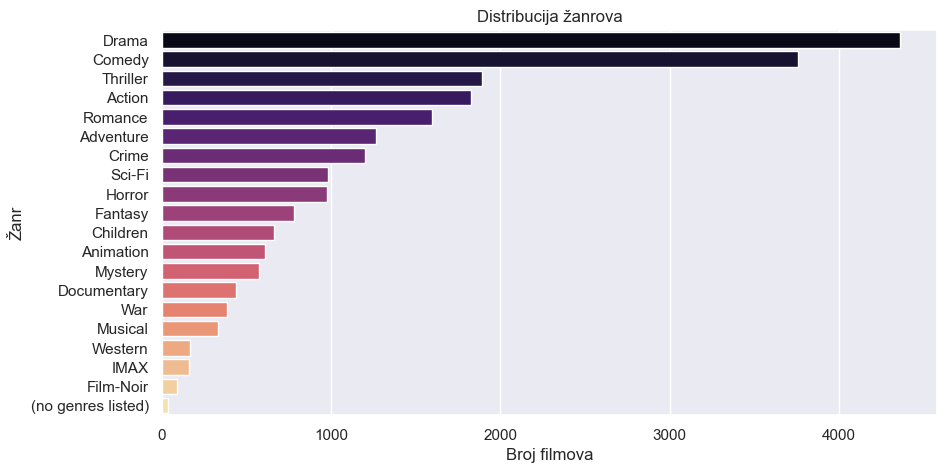

In [21]:
# analiza žanrova
all_genres = movies['genres'].str.split('|').explode()
genre_counts = all_genres.value_counts()

plt.figure(figsize=(10,5))
sns.barplot(y=genre_counts.index, x=genre_counts.values, palette="magma")
plt.title("Distribucija žanrova")
plt.xlabel("Broj filmova")
plt.ylabel("Žanr")
plt.show()

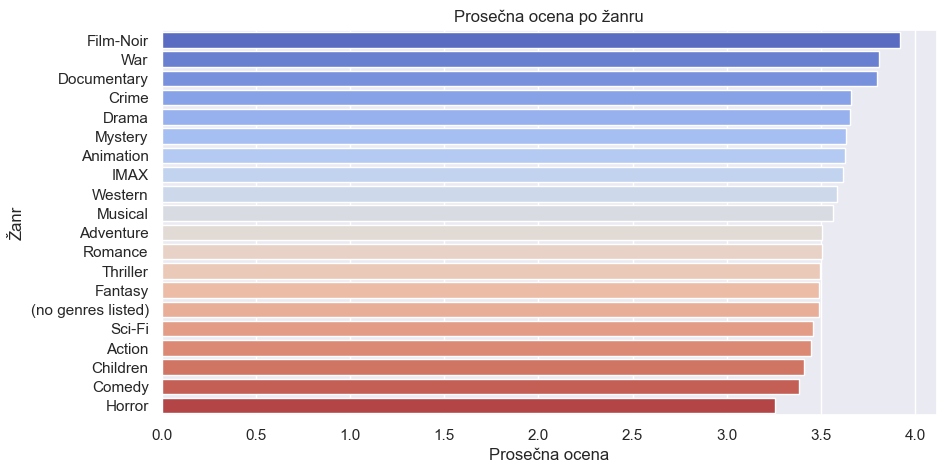

In [22]:
movies_expanded = movies.copy()
movies_expanded['genre'] = movies_expanded['genres'].str.split('|')
movies_expanded = movies_expanded.explode('genre')

merged = pd.merge(ratings, movies_expanded, on='movieId', how='inner')
genre_ratings = merged.groupby('genre')['rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="coolwarm")
plt.title("Prosečna ocena po žanru")
plt.xlabel("Prosečna ocena")
plt.ylabel("Žanr")
plt.show()


## 6. Sparsity matrice ocena

Sparsity matrice: 0.9830 (98.30% nepopunjeno)


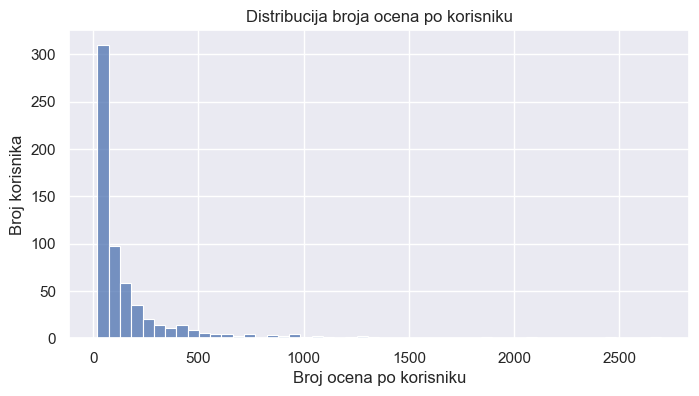

In [23]:
sparsity = 1 - (len(ratings) / (n_users * n_movies))
print(f"Sparsity matrice: {sparsity:.4f} ({sparsity*100:.2f}% nepopunjeno)")

# opcionalno: raspodela broja ocena po korisniku
ratings_per_user = ratings.groupby('userId')['rating'].count()
plt.figure(figsize=(8,4))
sns.histplot(ratings_per_user, bins=50)
plt.title("Distribucija broja ocena po korisniku")
plt.xlabel("Broj ocena po korisniku")
plt.ylabel("Broj korisnika")
plt.show()


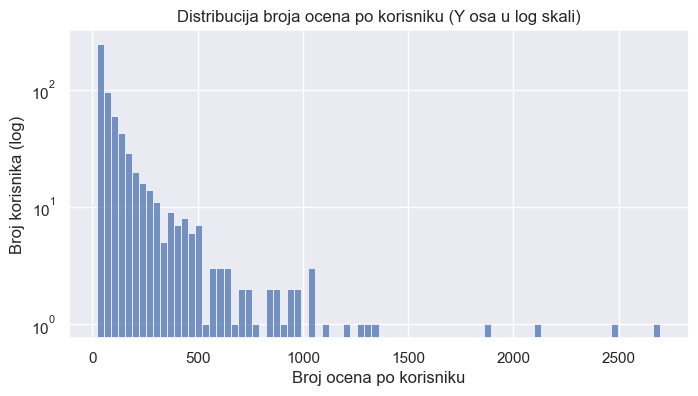

count     610.000000
mean      165.304918
std       269.480584
min        20.000000
25%        35.000000
50%        70.500000
75%       168.000000
90%       400.300000
95%       610.750000
max      2698.000000
Name: rating, dtype: float64

In [24]:
ratings_per_user = ratings.groupby('userId')['rating'].count()

plt.figure(figsize=(8,4))
sns.histplot(ratings_per_user, bins=80, log_scale=(False, True))
plt.title("Distribucija broja ocena po korisniku (Y osa u log skali)")
plt.xlabel("Broj ocena po korisniku")
plt.ylabel("Broj korisnika (log)")
plt.show()

# Kvantili korisnika
display(ratings_per_user.describe(percentiles=[0.25, 0.5, 0.75, 0.9, 0.95]))


Ukupan broj tagova: 3683
Broj jedinstvenih tagova: 1589


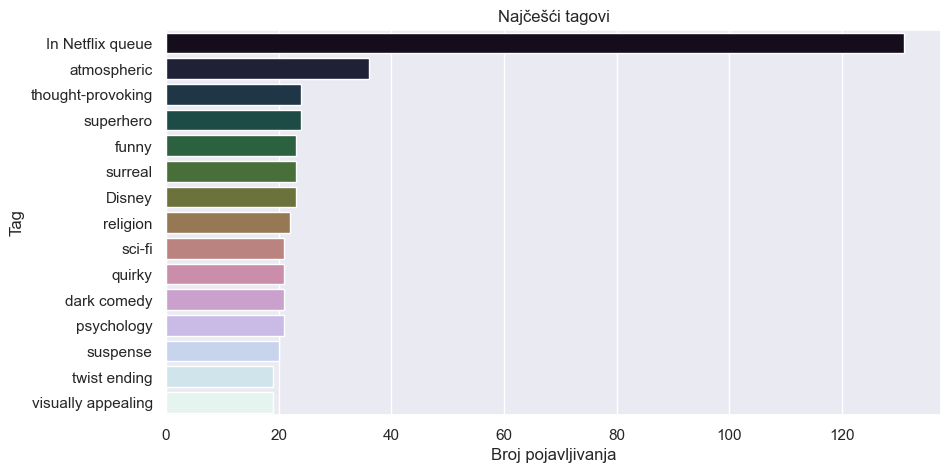

In [25]:
# broj tagova
print("Ukupan broj tagova:", len(tags))
print("Broj jedinstvenih tagova:", tags['tag'].nunique())

# najčešći tagovi
top_tags = tags['tag'].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(y=top_tags.index, x=top_tags.values, palette="cubehelix")
plt.title("Najčešći tagovi")
plt.xlabel("Broj pojavljivanja")
plt.ylabel("Tag")
plt.show()

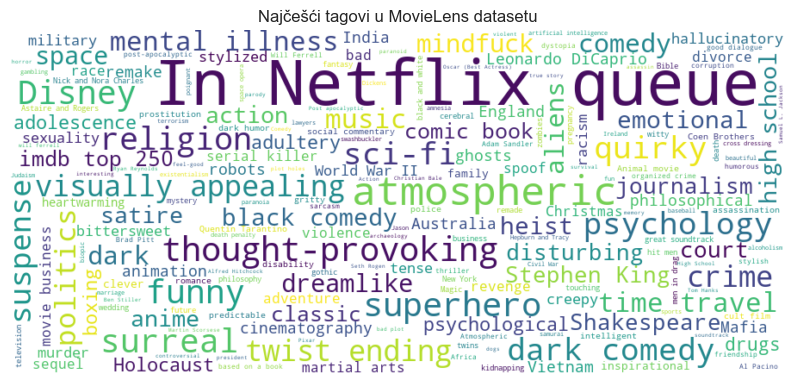

In [26]:
from collections import Counter
from wordcloud import WordCloud

tag_counts = Counter(tags['tag'])
wordcloud = WordCloud(width=900, height=400, background_color='white').generate_from_frequencies(tag_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Najčešći tagovi u MovieLens datasetu")
plt.show()


In [27]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()
num_ratings = len(ratings)
sparsity = (num_ratings / (n_users * n_movies)) * 100

print(f"Popunjenost matrice korisnik–film: {sparsity:.4f}%")


Popunjenost matrice korisnik–film: 1.7000%


In [30]:
unique_tags = tags['tag'].unique()

In [31]:
len(unique_tags)

1589

In [32]:
np.set_printoptions(threshold=np.inf)
unique_tags

array(['funny', 'Highly quotable', 'will ferrell', 'Boxing story', 'MMA',
       'Tom Hardy', 'drugs', 'Leonardo DiCaprio', 'Martin Scorsese',
       'way too long', 'Al Pacino', 'gangster', 'mafia', 'Mafia',
       'holocaust', 'true story', 'twist ending', 'Anthony Hopkins',
       'courtroom drama', 'britpop', 'indie record label', 'music',
       'dumpster diving', 'Sustainability', 'romantic comedy', 'wedding',
       'painter', 'bloody', 'black hole', 'sci-fi', 'time-travel',
       'fantasy', 'magic board game', 'Robin Williams',
       'beautiful scenery', 'epic', 'historical', 'inspirational',
       'Medieval', 'mel gibson', 'Oscar (Best Cinematography)', 'revenge',
       'sword fight', 'black comedy', 'Christina Ricci',
       'Christopher Lloyd', 'dark comedy', 'family', 'gothic',
       'Andy Garcia', 'Classic', 'Francis Ford Coppola', 'Family',
       'quirky', 'Macaulay Culkin', 'sequel', 'animation', 'Disney',
       'original', 'Pixar', 'Tom Hanks', 'ancient Rome', 'E